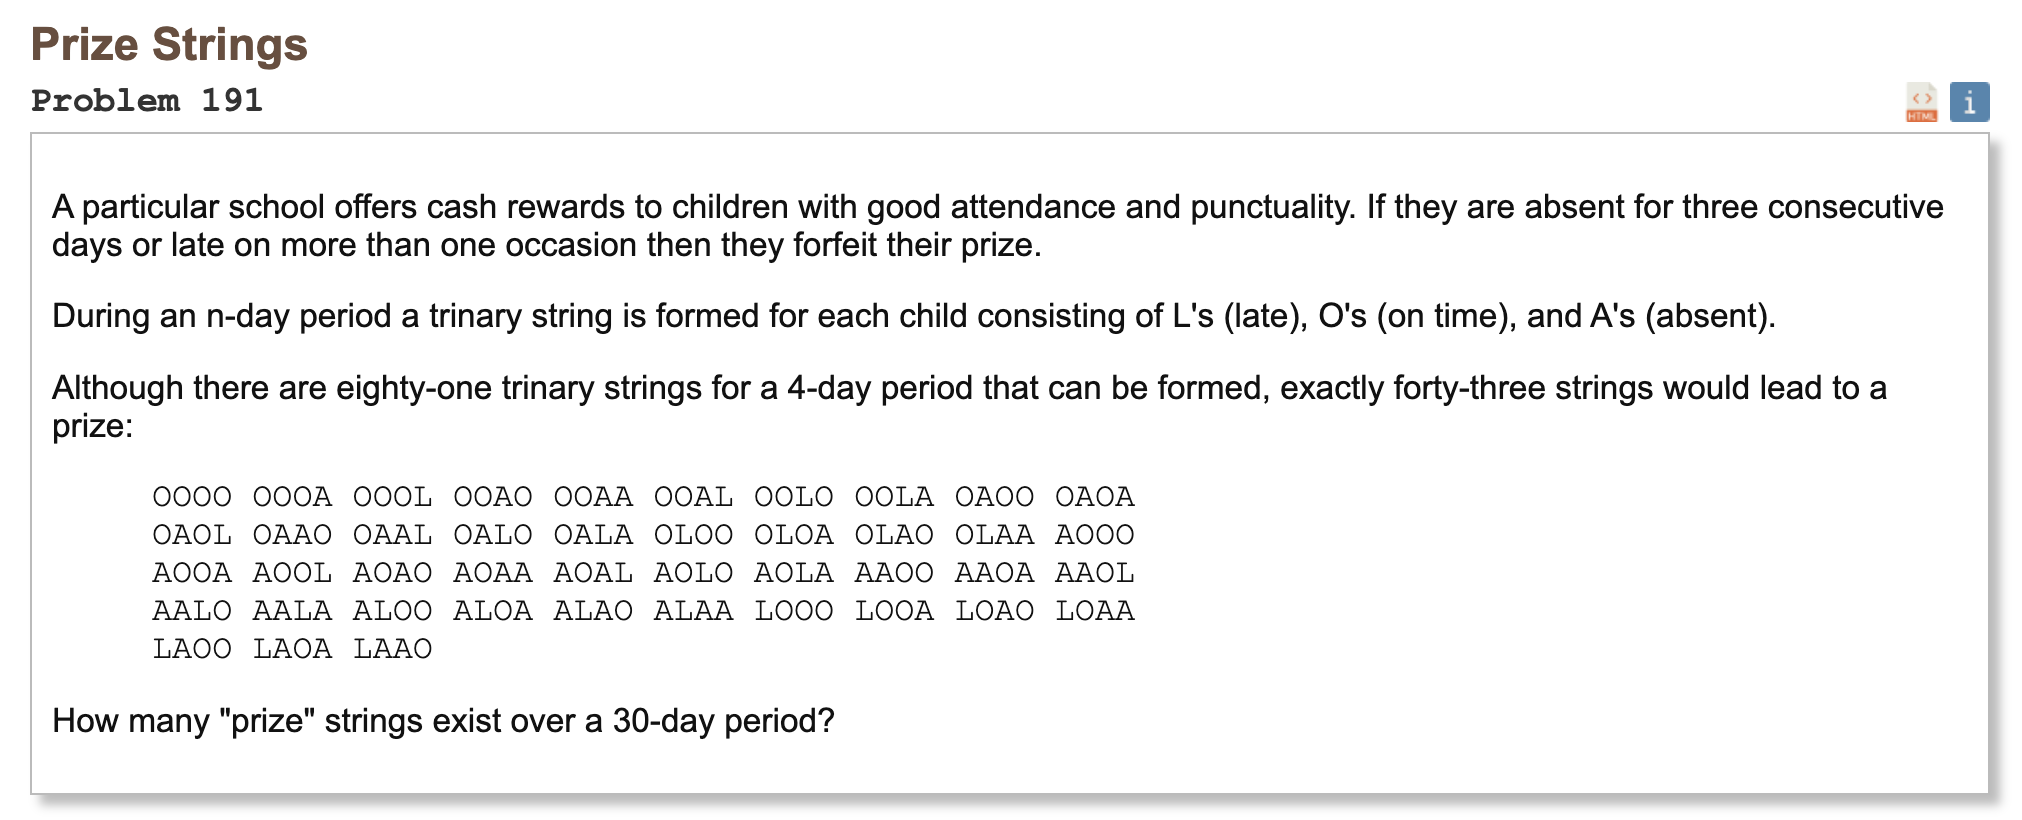

## Initial approach

* we need to count strings built from three symbols with rules that forbid certain patterns
* a valid string cannot contain three absents in a row and cannot contain more than one late
* we track the count of valid strings by remembering only two things, how many consecutive absents we have and how many lates we have used
* each new day we extend all current valid states by adding O or A or L when allowed
* this creates a small dynamic system with a few states instead of checking all huge strings
* we run this process for thirty steps and sum all states that remain valid
* this builds the count efficiently with simple integer transitions

In [1]:
def prize_strings(n):
    states = {}
    states[(0, 0)] = 1
    for _ in range(n):
        new = {}
        for (a, l), count in states.items():
            key = (0, l)
            new[key] = new.get(key, 0) + count
            if a < 2:
                key = (a + 1, l)
                new[key] = new.get(key, 0) + count
            if l < 1:
                key = (0, l + 1)
                new[key] = new.get(key, 0) + count
        states = new
    return sum(states.values())

In [2]:
%%time
result = prize_strings(30)
print("Result:", result)

Result: 1918080160
CPU times: user 108 μs, sys: 19 μs, total: 127 μs
Wall time: 139 μs
